### Exploratory data analysis on Banking stock prices
* in this notebook we will explore bank stocks and thier correlation with each other 
* cheking correlation with each other will help us create pair 
* and i will only explore data from 2014 and 2015 to select pairs as from 2016 we will be running stratergy and i want to avoid look ahead bias 

In [1]:
import pandas as pd 
import numpy as np 
import datetime 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import nsepy 
import seaborn as sns
import os
import cufflinks as cf
%matplotlib inline 
plt.style.use('ggplot')

In [2]:
path = 'C:\\Users\\sahil\\Documents\\learning\\springborad projects\\capstone_project_1\\data'

sec_names = ['BANKNIFTY.csv',
             'AXISBANK.csv',
             'BANKBARODA.csv',
             'BANKINDIA.csv',
             'HDFC.csv',
             'HDFCBANK.csv',
             'ICICIBANK.csv',
             'IDBI.csv',
             'KOTAKBANK.csv',
             'PNB.csv',
             'SBIN.csv']

In [2]:
sec_names

['BANKNIFTY.csv',
 'AXISBANK.csv',
 'BANKBARODA.csv',
 'BANKINDIA.csv',
 'HDFC.csv',
 'HDFCBANK.csv',
 'ICICIBANK.csv',
 'IDBI.csv',
 'KOTAKBANK.csv',
 'PNB.csv',
 'SBIN.csv']

### Getting all stock Close prices into one Dataframe 

In [3]:
df = pd.read_csv(path + "\\" + 'HDFC.csv',index_col = 0,parse_dates=True)
df = pd.DataFrame(index = df.index)

In [4]:
all_data = {}
for sec in sec_names:
    print(sec)
    sample = pd.read_csv(path + "\\" + sec,index_col=0,parse_dates=True)["Close"]
    df[sec] = sample

BANKNIFTY.csv
AXISBANK.csv
BANKBARODA.csv
BANKINDIA.csv
HDFC.csv
HDFCBANK.csv
ICICIBANK.csv
IDBI.csv
KOTAKBANK.csv
PNB.csv
SBIN.csv


In [5]:
# getting data from 2014 and 2015 
df = df.loc["2014":"2015"].copy()

### Cheking for Nan values 

In [6]:
df.dropna(inplace=True)
df.isna().sum()

BANKNIFTY.csv     0
AXISBANK.csv      0
BANKBARODA.csv    0
BANKINDIA.csv     0
HDFC.csv          0
HDFCBANK.csv      0
ICICIBANK.csv     0
IDBI.csv          0
KOTAKBANK.csv     0
PNB.csv           0
SBIN.csv          0
dtype: int64

### Plotting Daily prices of all the banking stocks that we have 

In [7]:
daily = df.resample("D").last().dropna()

<Figure size 432x288 with 0 Axes>

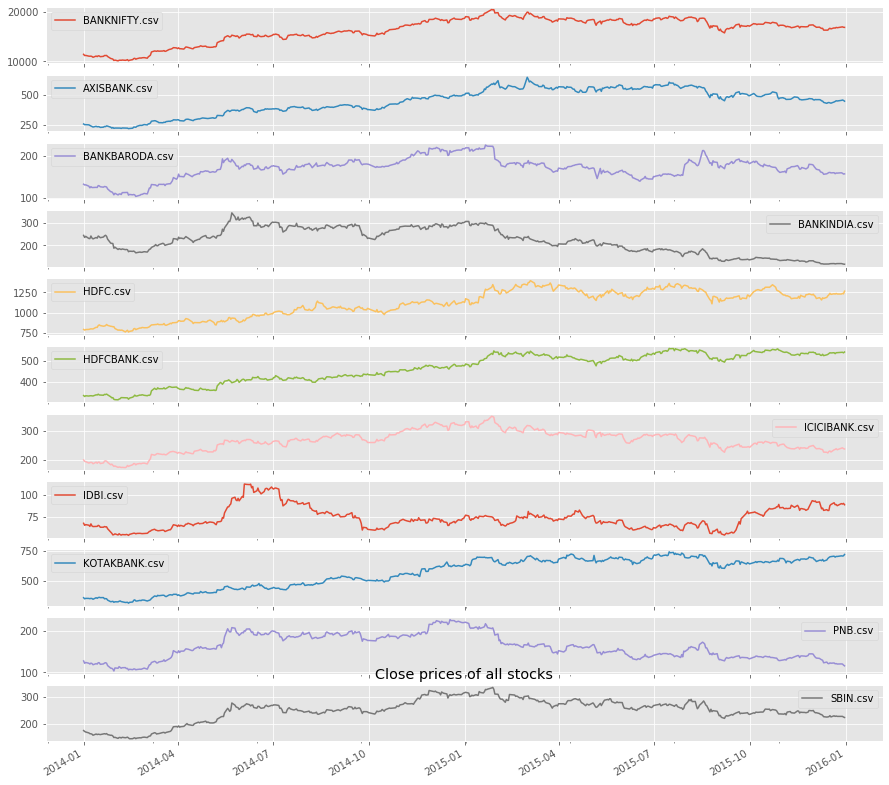

In [9]:
plt.figure()
daily.plot(subplots = True,figsize = (15,15))
plt.title("Close prices of all stocks")
plt.show()

### Plotting Normalize Plot of all the banking stocks

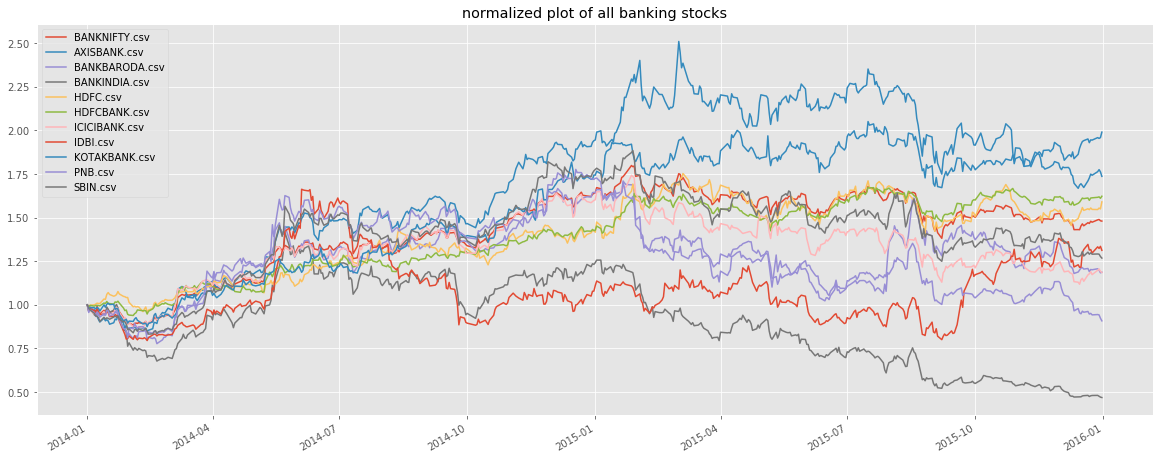

In [10]:
(daily/daily.iloc[0]).plot(figsize = (20,8))
plt.title("normalized plot of all banking stocks")
plt.show()

### plotting correlation heatmap 

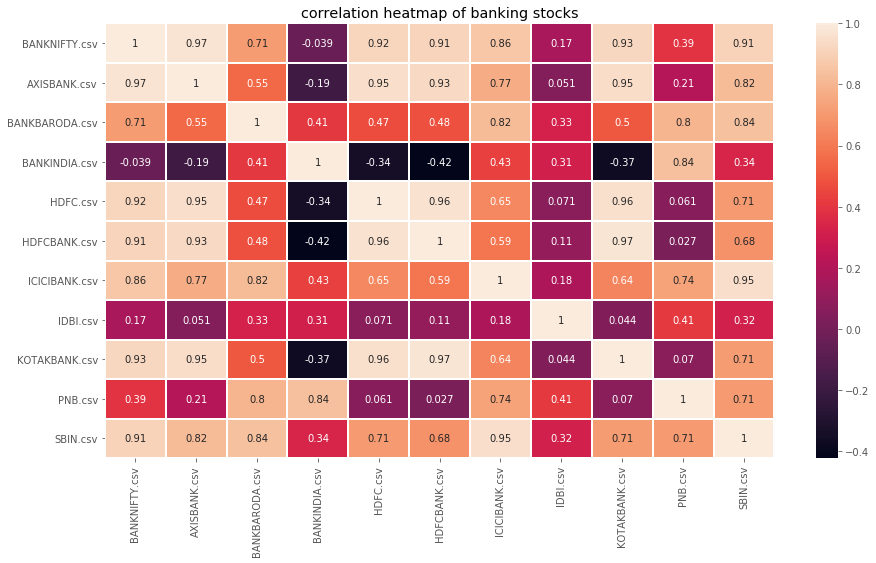

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(daily.corr(),linecolor='white',linewidths=1,annot=True)
plt.title("correlation heatmap of banking stocks")
plt.show()

### Below Heatmap showing wich pairs have strong Negative or Positive correlation 
* 1 means pair have strong neg or pos Correlation and vice-versa

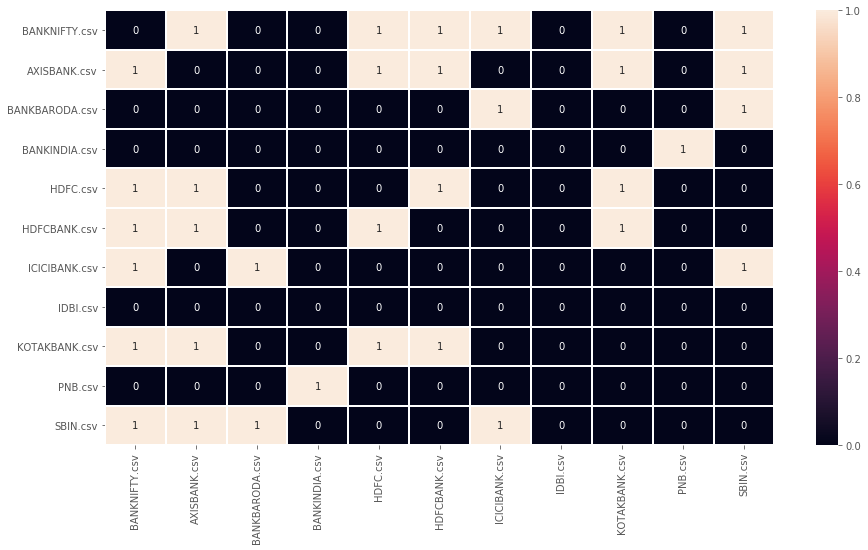

In [12]:
plt.figure(figsize=(15,8))
c = daily.corr()
sns.heatmap(((c > 0.8) | (c < -0.8)) & (c != 1),linecolor='white',linewidths=1,annot = True)
plt.show()

### Plotting a pair plot 

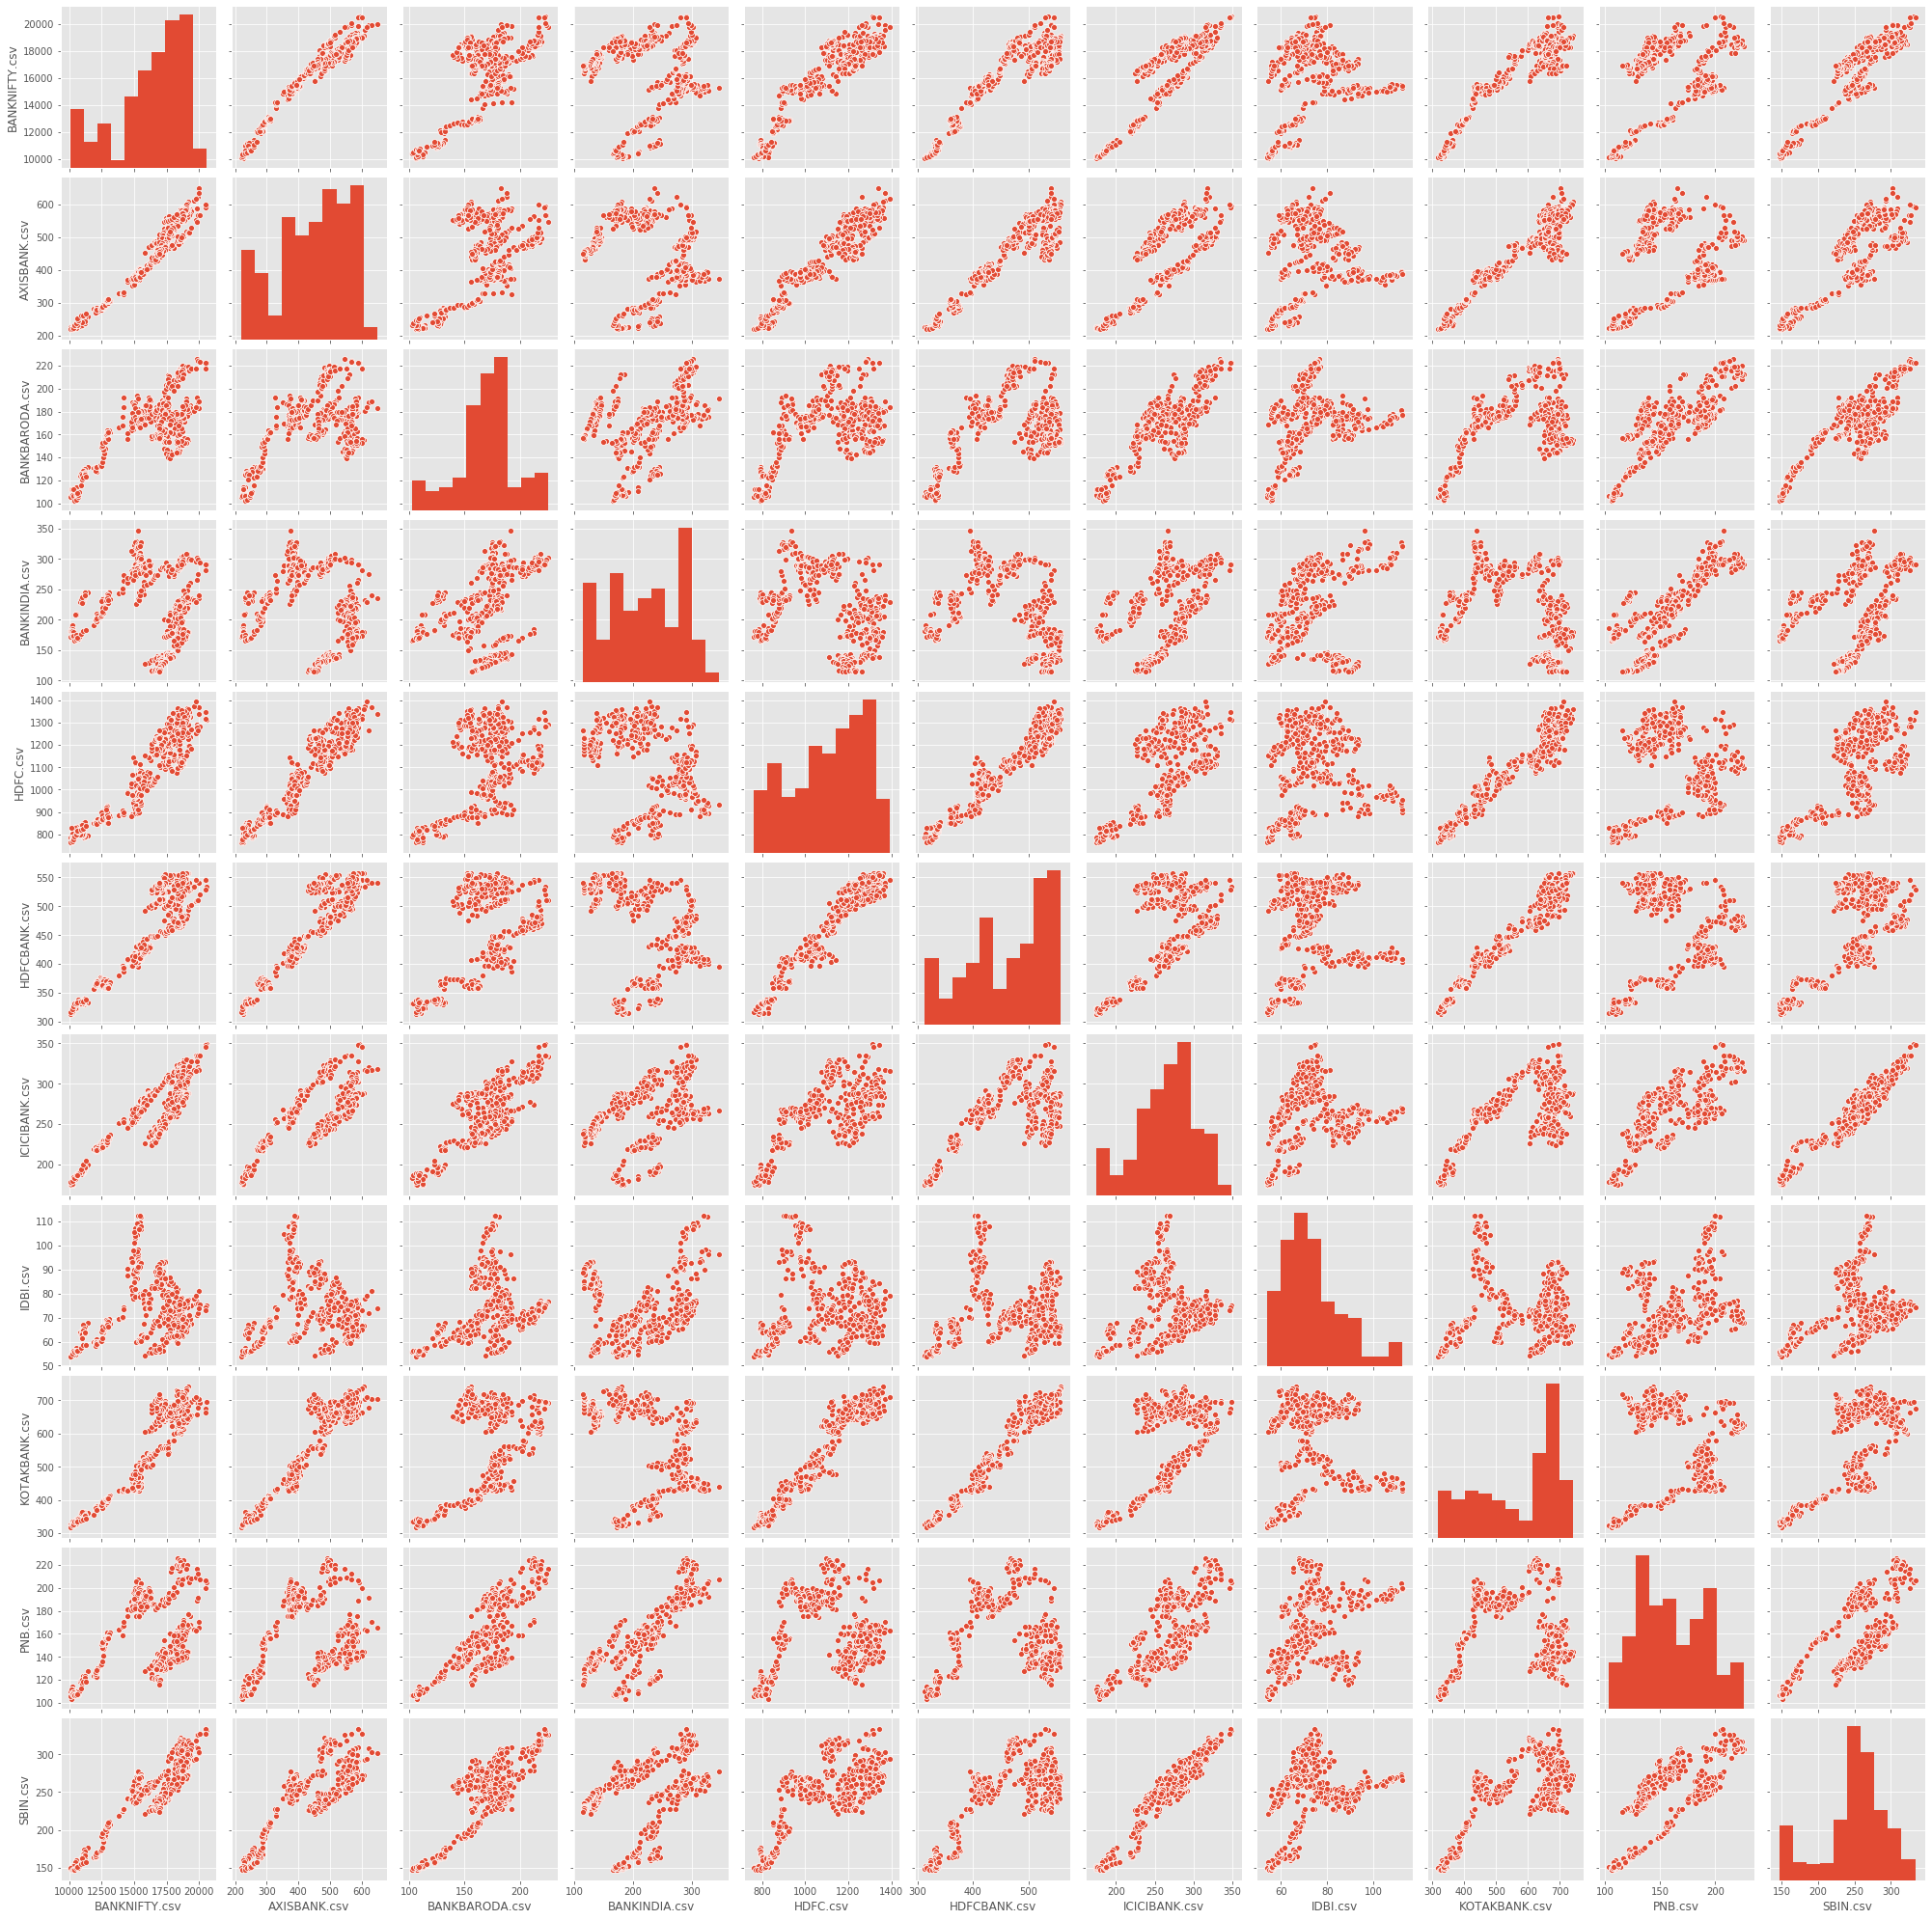

In [13]:
sns.pairplot(daily,palette='coolwarm')
plt.show()